# CourseProject--DaisyWorld

## 1. 1-D DaisyWorld

### 1.1 Formula

$$\left\{
\begin{aligned}
\frac{\partial\alpha_{w}}{\partial t}&=\alpha_{w}\left[\alpha_{g}\beta(T_{w})-\gamma\right]\\
\frac{\partial\alpha_{b}}{\partial t}&=\alpha_{b}\left[\alpha_{g}\beta(T_{b})-\gamma\right]\\
\alpha_{g}&\equiv p-\alpha_{w}-\alpha_{b}
\end{aligned}
\right.
$$

$$
\beta(T)=\left\{
\begin{array}{rcl}
1-k(T-T_{opt})^{2}       &      & {|T-T_{opt}|<k^{-\frac{1}{2}}}\\
0     &      & {otherwise}
\end{array}
\right.
$$

$$
\begin{equation}
A=\alpha_{w}a_{w}+\alpha_{b}a_{b}+\alpha_{g}a_{g},\left(a_{g}=\frac{1}{2}\right)
\end{equation}
$$

$$\left\{
\begin{aligned}
T_{w}^{4}&=q(A-a_{w})+T^{4}\\
T_{b}^{4}&=q(A-a_{b})+T^{4}\\
T_{g}^{4}&=q(A-a_{g})+T^{4}\\
\end{aligned}
\right.
$$

$$
\begin{equation}
SL(1-A)=\sigma T^{4}
\end{equation}
$$

### 1.2 Constants and variables

Constant

$$
\begin{aligned}
&\gamma\\
&k=17.5^{-2}\\
&T_{opt}=22.5^\circ C=295.5K\\
&a_{w}>a_{g}=\frac{1}{2}>a_{b}\\
&SL=917W\cdot m^{-2}\\
&q=2.06\times10^{9}K^{4}\\
&\sigma=5.67\times10^{-8}W\cdot m^{-2}\cdot K^{-4}
\end{aligned}
$$

Variables

$$
\begin{equation}
\alpha_{w},\alpha_{b},(\alpha_{g})
\end{equation}
$$

In [44]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

gamma = 0.1
k = 17.5 ** (-2)
Topt = 295.5
aw = 0.9
ag = 0.5
ab = 0.1
q = 2.06e9
SL = 917
sigma = 5.67e-8

In [45]:
def beta(T):
    if abs(T - Topt) < k ** (-0.5):
        return 1 - k * (T - Topt) ** 2
    else:
        return 0


def f(data, t):
    [alphaw,alphab] = data[:]
    alphag = 1 - alphaw - alphab
    A = alphaw * aw + alphab * ab + alphag * ag
    T4 = SL * (1 - A) / sigma
    Tw = (q * (A - aw) + T4) ** 0.25
    Tb = (q * (A - ab) + T4) ** 0.25
    Tg = (q * (A - ag) + T4) ** 0.25
    alphaw1 = alphaw * (alphag * beta(Tw) - gamma)
    alphab1 = alphab * (alphag * beta(Tb) - gamma)
    return [alphaw1, alphab1]

### 1.3 Stability

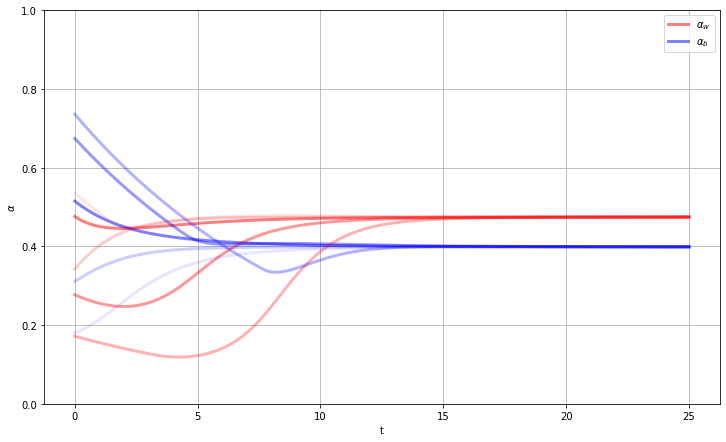

In [46]:
SL=917
t = np.linspace(0, 25, 1000)

fig = plt.figure(figsize=(10, 6))

for i in range(5):
    tmp1 = random.uniform(0.1, 0.9)
    tmp2 = random.uniform(0, 1 - tmp1)
    data0 = [tmp1, tmp2]
    sol = odeint(f, data0, t)
    w = sol[:,0]
    b = sol[:,1]
    plt.plot(t, w, color='r', lw=3, alpha=-0.1*i+0.5)
    plt.plot(t, b, color='b', lw=3, alpha=-0.1*i+0.5)
    plt.grid()
    fig.tight_layout()

plt.xlabel('t')
plt.ylabel(r'$\alpha$')
plt.ylim([0, 1])
plt.legend([r'$\alpha_w$', r'$\alpha_b$'])

When balance is reached,
$$
\begin{equation}
\frac{\partial\alpha_{w}}{\partial t}=0,\frac{\partial\alpha_{b}}{\partial t}=0
\end{equation}
$$

there are

$$
\left\{
\begin{aligned}
&\alpha_{g}\beta(T_{w})-\gamma =  0 \\
&\alpha_{g}\beta(T_{b})-\gamma =  0
\end{aligned}
\Rightarrow \beta(T_{w})=\beta(T_{b})\Rightarrow|T_{w}-T_{opt}|=|T_{b}-T_{opt}|
\right.
$$

(1)$T_{w}-T_{opt}=T_{b}-T_{opt}\Rightarrow T_{w}=T_{b}$, abandoned

(2)$T_{w}-T_{opt}=-T_{b}+T_{opt}\Rightarrow T_{w}=2T_{opt}-T_{b}$

while$T_{b}^{4}-T_{w}^{4}=q(a_{w}-a_{b})$

then$T_{b}^{4}-(2T_{opt}-T_{b})^{4}=q(a_{w}-a_{b})$

$T_b$ is determined by this cubic equation，then $T_{w},\alpha_{w},\alpha_{b}$ are also determined.

This indicates that when the environment is fixed, $\alpha_{w},\alpha_{b}$ will stabilize.

### 1.4 Influence of SL on steady state

In [47]:
def Alpha2T(alphaw, alphab):
    alphag = 1 - alphaw - alphab
    A = alphaw * aw + alphab * ab + alphag * ag
    T4 = SL * (1 - A) / sigma
    T = T4 ** 0.25
    Tw = (q * (A - aw) + T4) ** 0.25
    Tb = (q * (A - ab) + T4) ** 0.25
    Tg = (q * (A - ag) + T4) ** 0.25
    return Tw, Tb, Tg, T

In [48]:
SL=917
alpha = [[], []]
Tw_list = []
Tb_list = []
Tg_list = []
T_list = []
t1 = np.linspace(0, 100, 10000)

SLrange = np.linspace(500,1700,1200)
for i in SLrange:
    SL = i
    tmp = odeint(f, data0, t1)
    alpha[0].append(tmp[:,0][-1])
    alpha[1].append(tmp[:,1][-1])
    Tw, Tb, Tg, T = Alpha2T(alpha[0][-1], alpha[1][-1])
    Tw_list.append(Tw)
    Tb_list.append(Tb)
    Tg_list.append(Tg)
    T_list.append(T)

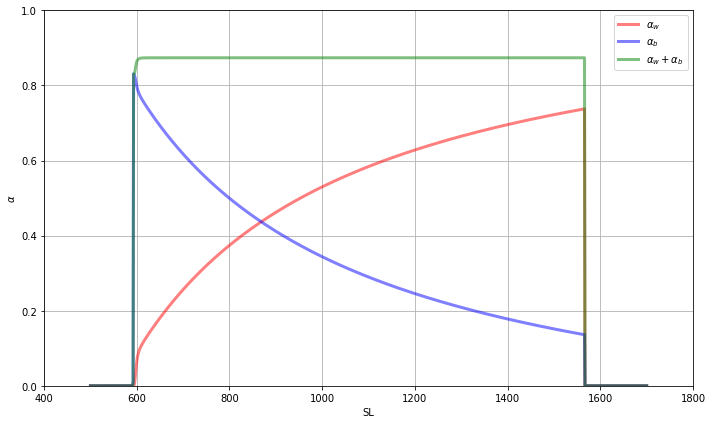

In [49]:
SL=917
total = np.array(alpha[0]) + np.array(alpha[1])

fig = plt.figure(figsize=(10, 6))
plt.plot(SLrange,alpha[0], color='r', lw=3, alpha=0.5)
plt.plot(SLrange,alpha[1], color='b', lw=3, alpha=0.5)
plt.plot(SLrange,total, color='g', lw=3, alpha=0.5)
plt.xlabel('SL')
plt.ylabel(r'$\alpha$')
plt.xlim([400, 1800])
plt.ylim([0, 1])
plt.legend([r'$\alpha_w$', r'$\alpha_b$', r'$\alpha_w +\alpha_b$'])
plt.grid()
fig.tight_layout()

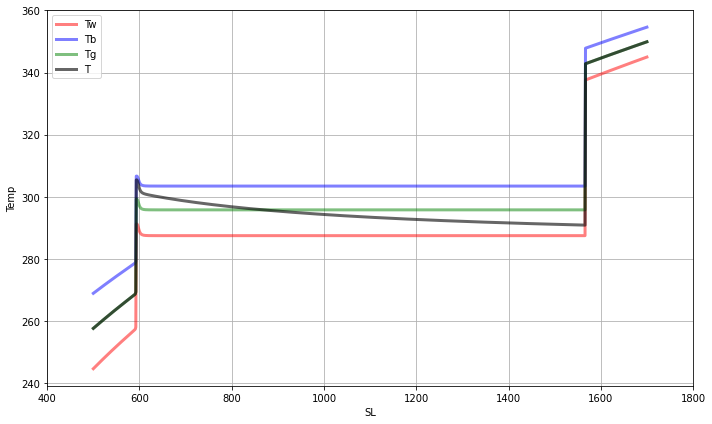

In [50]:
SL=917
fig = plt.figure(figsize=(10, 6))
plt.plot(SLrange,Tw_list, color='r', lw=3, alpha=0.5)
plt.plot(SLrange,Tb_list, color='b', lw=3, alpha=0.5)
plt.plot(SLrange,Tg_list, color='g', lw=3, alpha=0.5)
plt.plot(SLrange,T_list, color='black', lw=3, alpha=0.6)
plt.xlabel('SL')
plt.ylabel('Temp')
plt.xlim([400, 1800])
plt.legend(['Tw', 'Tb', 'Tg', 'T'])
plt.grid()
fig.tight_layout()

It can be seen that at $600<SL<1600 $, daisies can grow well and change with SL:

When the light is low, black daisies are dominant; When the light is strong, white daisies are dominant; This keeps its temperature at a stable value.

Too low or too high light will make daisies unable to survive.

## 2. 2-D DaisyWorld

### 2.1 Formula

For a space point, suppose there are $n_w$ white dots, birth rate $\beta_ w$，$n_ b$black dots, birth rate is $\beta_B$, the probability is calculated as follows:

$$
\begin{aligned}
&P(B|n_{w}=0)=1-(1-\beta_{b})^{n_{b}}\\
&P(W|n_{b}=0)=1-(1-\beta_{w})^{n_{w}}\\
&P(E)=[1-P(B|n_{w}=0)]\cdot[1-P(B|n_{b}=0)]\\
&P(B)=\left(1-P(E)\right)\frac{P(B|n_{w}=0)}{P(B|n_{w}=0)+P(W|n_{b}=0)}\\
&P(W)=\left(1-P(E)\right)\frac{P(W|n_{b}=0)}{P(B|n_{w}=0)+P(W|n_{b}=0)}
\end{aligned}
$$

For the grid points that have daisies growing, there is a probability of $\gamma $to die and become a space point, and a probability of $1-\gamma$to keep growing

In [34]:
SL = 917

length = 100
width = 200

cell = np.zeros((length, width), int)
cell_temp = copy.deepcopy(cell)

In [35]:
SL=917
for i in range(0, length):
    for j in range(0, width):
        cell_temp[i][j] = random.randint(-1, 1)

a = [[], []]
for t in range(50):
    cell = copy.deepcopy(cell_temp)
    # plt.imshow(cell)
    # plt.pause(0.1)

    # ns = [white, black, ground]
    ns = [0, 0, 0]
    for i in range(0, length):
        for j in range(0, width):
            if cell[i][j] == 1:
                ns[0] += 1
            elif cell[i][j] == -1:
                ns[1] += 1
            elif cell[i][j] == 0:
                ns[2] += 1
    alpha = np.array(ns) / (length * width)
    [alphaw, alphab, alphag] = alpha[:]
    a[0].append(alphaw)
    a[1].append(alphab)
    A = alphaw * aw + alphab * ab + alphag * ag
    T4 = SL * (1 - A) / sigma
    Tw = (q * (A - aw) + T4) ** 0.25
    Tb = (q * (A - ab) + T4) ** 0.25
    Tg = (q * (A - ag) + T4) ** 0.25
    betaw = alphag * beta(Tw)
    betab = alphag * beta(Tb)

    for i in range(0, length):
        for j in range(0, width):
            neighbors = [cell[(i - 1) % length][(j - 1) % width], cell[(i - 1) % length][j],
                         cell[(i - 1) % length][(j + 1) % width],
                         cell[i][(j - 1) % width], cell[i][(j + 1) % width],
                         cell[(i + 1) % length][(j - 1) % width], cell[(i + 1) % length][j],
                         cell[(i + 1) % length][(j + 1) % width]]
            nw = 0
            nb = 0
            for neighbor in neighbors:
                if neighbor == 1:
                    nw += 1
                elif neighbor == -1:
                    nb += 1
            if nw == 0 and nb == 0:
                Pe = 1
                Pb = 0
                Pw = 0
            else:
                Pb0 = 1 - (1 - betab) ** nb
                Pw0 = 1 - (1 - betaw) ** nw
                Pe = (1 - Pb0) * (1 - Pw0)
                Pb = (1 - Pe) * Pb0 / (Pb0 + Pw0)
                Pw = (1 - Pe) * Pw0 / (Pb0 + Pw0)
            Pd = gamma

            if cell[i][j] == 0:
                r = random.random()
                if r < Pb:
                    cell_temp[i][j] = -1
                elif Pb <= r < (Pb + Pw):
                    cell_temp[i][j] = 1
                else:
                    continue
            else:
                r = random.random()
                if r < Pd:
                    cell_temp[i][j] = 0
                else:
                    continue

In [36]:
SL=917
t2 = np.linspace(0, 50, 1000)
ans = odeint(f, [0.33, 0.33], t2)

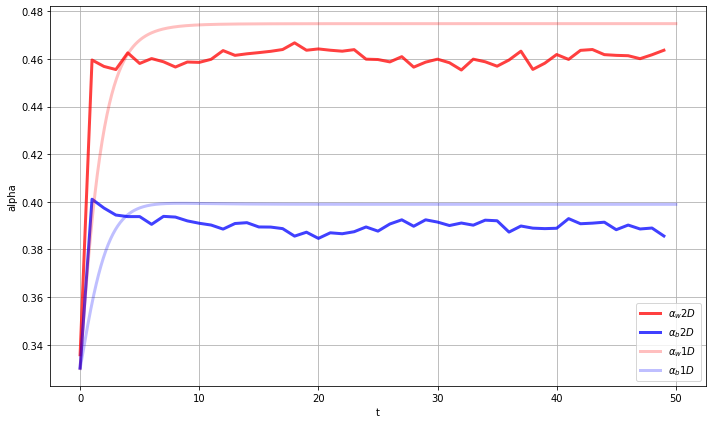

In [37]:
SL=917
fig = plt.figure(figsize=(10, 6))
plt.plot(a[0], color='r', lw=3, alpha=0.75)
plt.plot(a[1], color='b', lw=3, alpha=0.75)
plt.plot(t2,ans[:,0], color='r', lw=3, alpha=0.25)
plt.plot(t2,ans[:,1], color='b', lw=3, alpha=0.25)
plt.xlabel('t')
plt.ylabel(r'$\alpha$')
plt.legend([r'$\alpha_{w} 2D$', r'$\alpha_{b} 2D$', r'$\alpha_{w} 1D$', r'$\alpha_{b} 1D$'])
plt.grid()
fig.tight_layout()
plt.show()

It can be seen that the results of 1-D and 2-D models are very similar, and 2-D results are slightly smaller than 1-D results

## 3. Predator-Prey Model

### 3.1 Formula

$$\left\{
\begin{aligned}
\frac{dx}{dt}&=-ax+bxy\\
\frac{dy}{dt}&=cy-dxy
\end{aligned}
\right.
$$

In [38]:
[a, b, c, d] = [0.2, 0.4, 0.1, 1.2]

def g(data, t):
    [x, y] = data[:]
    x1 = -a * x + b * x * y
    y1 = c * y - d * x * y
    return [x1, y1]

data0 = [0.1, 0.67]
t3 = np.linspace(0, 100, 1000)

ans = odeint(g, data0, t3)

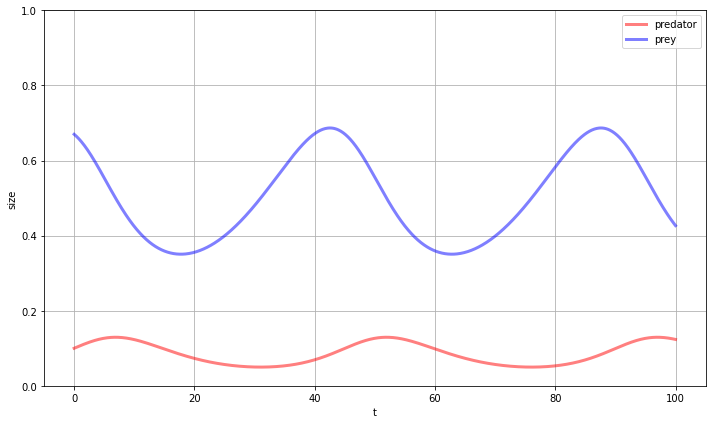

In [39]:
x = ans[:,0]
y = ans[:,1]

fig = plt.figure(figsize=(10, 6))
plt.plot(t3, x, color='r', lw=3, alpha=0.5)
plt.plot(t3, y, color='b', lw=3, alpha=0.5)
plt.xlabel('t')
plt.ylabel('size')
plt.ylim([0, 1])
plt.legend(['predator', 'prey'])
plt.grid()
fig.tight_layout()

### 3.2 Combination of the two models

$$\left\{
\begin{aligned}
\frac{\partial\alpha_{w}}{\partial t}&=\alpha_{w}\left[\alpha_{g}\beta(T_{w})-\lambda_{1}\theta-\gamma_{0}\right]\\
\frac{\partial\alpha_{b}}{\partial t}&=\alpha_{b}\left[\alpha_{g}\beta(T_{b})-\lambda_{1}\theta-\gamma_{0}\right]\\
\frac{\partial\theta}{\partial t}&=-\lambda_{2}\theta+\lambda_{3}(\alpha_{w}+\alpha_{b})\theta
\end{aligned}
\right.
$$

In [40]:
[lambda1, lambda2, lambda3] = [1, 0.5, 0.75]

def h(data, t):
    [alphaw,alphab, theta] = data[:]
    alphag = 1 - alphaw - alphab
    A = alphaw * aw + alphab * ab + alphag * ag
    T4 = SL * (1 - A) / sigma
    Tw = (q * (A - aw) + T4) ** 0.25
    Tb = (q * (A - ab) + T4) ** 0.25
    Tg = (q * (A - ag) + T4) ** 0.25
    alphaw1 = alphaw * (alphag * beta(Tw) - lambda1 * theta - 0.05)
    alphab1 = alphab * (alphag * beta(Tb) - lambda1 * theta - 0.05)
    theta1 = -lambda2 * theta + lambda3 * (alphaw + alphab) * theta
    return [alphaw1, alphab1, theta1]

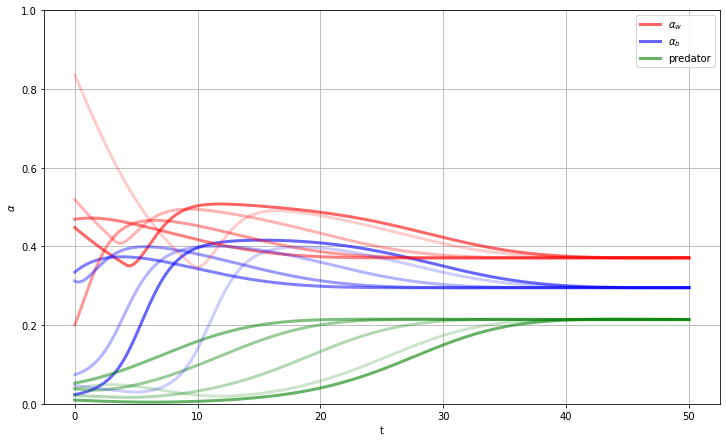

In [41]:
SL = 917
t4 = np.linspace(0, 50, 5000)

fig = plt.figure(figsize=(10, 6))

for i in range(5):
    tmp1 = random.uniform(0.1, 0.9)
    tmp2 = random.uniform(0, 1 - tmp1)
    tmp3 = random.uniform(0, 0.1)
    data0 = [tmp1, tmp2, tmp3]
    sol = odeint(h, data0, t4)
    w = sol[:,0]
    b = sol[:,1]
    p = sol[:,2]
    plt.plot(t4, w, color='r', lw=3, alpha=-0.1*i+0.6)
    plt.plot(t4, b, color='b', lw=3, alpha=-0.1*i+0.6)
    plt.plot(t4, p, color='g', lw=3, alpha=-0.1*i+0.6)
    plt.grid()
    fig.tight_layout()

plt.xlabel('t')
plt.ylabel(r'$\alpha$')
plt.ylim([0, 1])
plt.legend([r'$\alpha_w$', r'$\alpha_b$', 'predator'])

Unlike the expected periodic solution, the above results show that the solution of the model is stable, which may be related to the selection of $\lambda$ parameters.

## 4. References

[1]Wood, Andrew J., Graeme J. Ackland, James G. Dyke, Hywel T. P. Williams, and Timothy M. Lenton. "Daisyworld: A Review." Reviews of Geophysics (1985) 46.1 (2008): RG1001-N/a. Web.

[2]Lenton, Timothy M., and Marcel Van Oijen. "Gaia as a Complex Adaptive System." Philosophical Transactions of the Royal Society of London. Series B: Biological Sciences 357.1421 (2002): 683-95. Web.

[3]https://blog.csdn.net/qq_40680263/article/details/98773037?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522167195964116800182152080%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fblog.%2522%257D&request_id=167195964116800182152080&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~blog~first_rank_ecpm_v1~hot_rank-2-98773037-null-null.blog_rank_default&utm_term=%E5%85%83%E8%83%9E%E8%87%AA%E5%8A%A8%E6%9C%BA%20python&spm=1018.2226.3001.4450

[4]https://blog.csdn.net/weixin_45386909/article/details/107741647